In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
import numpy as np

In [4]:
def plot_labeled_price_by_time(df, start_time, end_time):
    """
    Vẽ biểu đồ giá Close với màu sắc theo Label (BUY, SELL, HOLD) trong khoảng thời gian cụ thể.

    Parameters:
    - df: DataFrame có các cột 'Date', 'Time', 'Close', 'Label'
    - start_time, end_time: định dạng datetime hoặc chuỗi có thể chuyển thành datetime
    """

    # Tạo bản sao và xử lý cột datetime
    df = df.copy()
    df['Datetime'] = pd.to_datetime(df['Date'].astype(str), errors='coerce')
    df.dropna(subset=['Datetime'], inplace=True)

    # Chuyển đổi thời gian đầu-cuối
    start_dt = pd.to_datetime(start_time)
    end_dt = pd.to_datetime(end_time)

    # Lọc dữ liệu theo thời gian
    df_sample = df[(df['Datetime'] >= start_dt) & (df['Datetime'] <= end_dt)].copy()

    if len(df_sample) < 2:
        print("Không đủ dữ liệu để vẽ.")
        return

    # Màu theo label
    color_map = {'BUY': 'blue', 'SELL': 'red', 'HOLD': 'yellow'}
    colors = df_sample['Label'].map(color_map).fillna('black')

    # Tạo LineCollection
    x = df_sample['Datetime'].values
    y = df_sample['Close'].values
    x_num = mdates.date2num(x)  # chuyển datetime sang số để vẽ

    points = np.array([x_num, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    segment_colors = colors.iloc[:-1].values

    fig, ax = plt.subplots(figsize=(14, 6))
    lc = LineCollection(segments, colors=segment_colors, linewidth=2)
    ax.add_collection(lc)

    # Thiết lập trục và tiêu đề
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(min(y), max(y))
    ax.set_title(f"Giá vàng từ {start_dt} đến {end_dt}")
    ax.set_xlabel("Thời gian")
    ax.set_ylabel("Giá Close")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    fig.autofmt_xdate()
    plt.grid(True)

    # Legend
    legend_elements = [
        Line2D([0], [0], color='blue', lw=2, label='BUY'),
        Line2D([0], [0], color='red', lw=2, label='SELL'),
        Line2D([0], [0], color='yellow', lw=2, label='HOLD')
    ]
    ax.legend(handles=legend_elements, title="Label")

    plt.show()


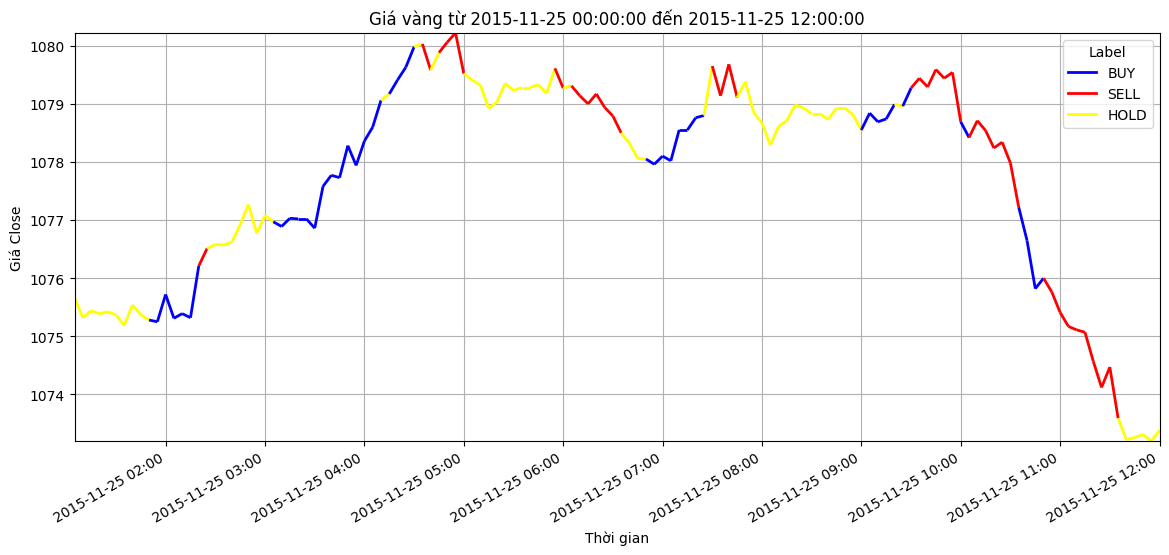

In [6]:
df = pd.read_csv('data/xauusd/kaggle/dynamic_labeled_train.csv')
plot_labeled_price_by_time(
    df,
    start_time='2015-11-25 00:00:00',
    end_time='2015-11-25 12:00:00'
)

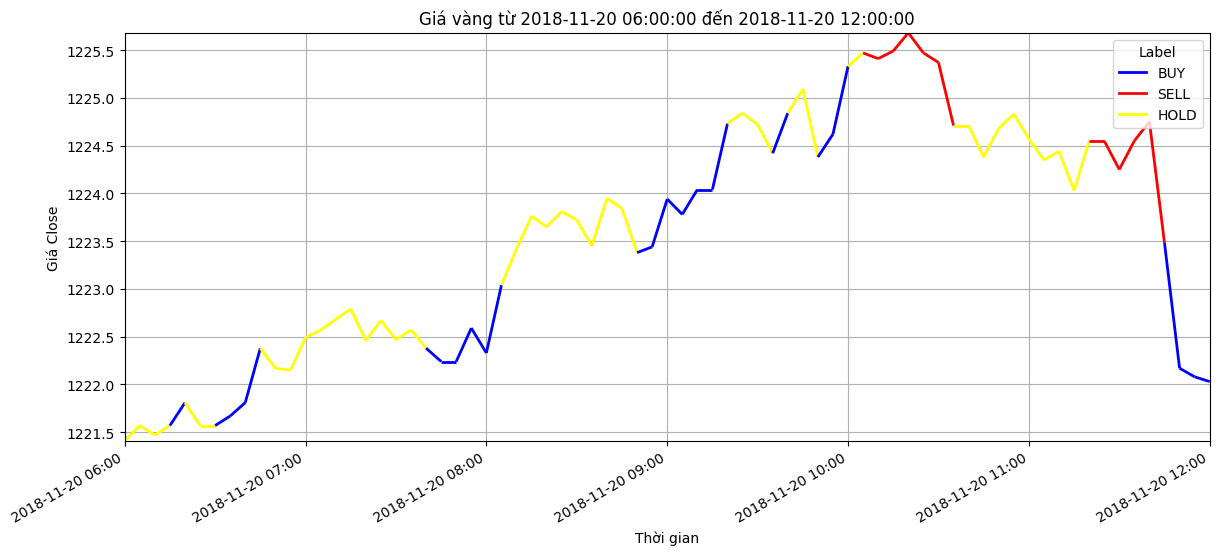

In [8]:
plot_labeled_price_by_time(
    df,
    start_time='2018-11-20 06:00:00',
    end_time='2018-11-20 12:00:00'
)

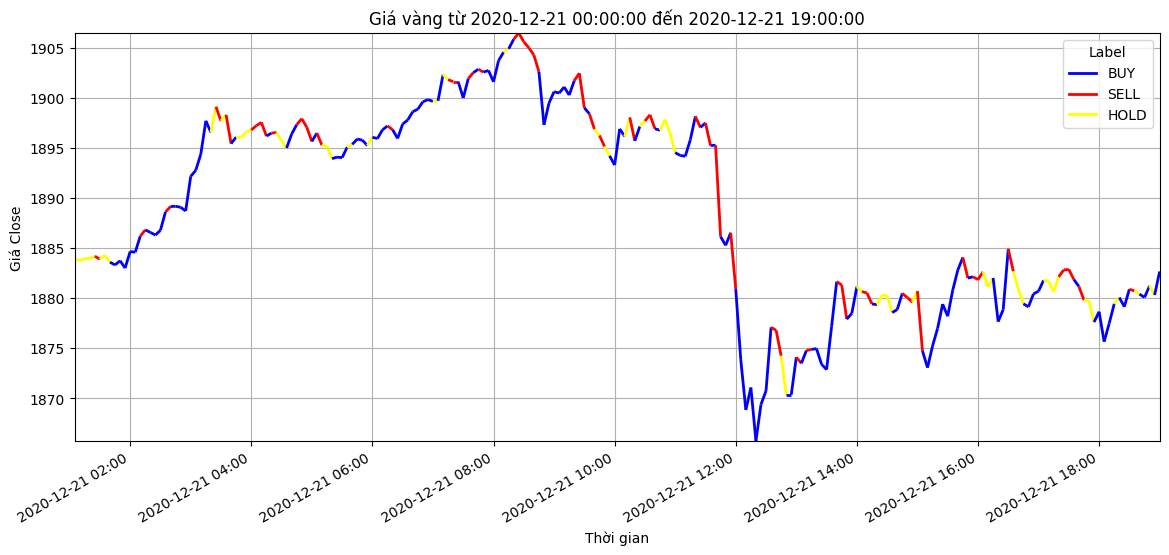

In [10]:
plot_labeled_price_by_time(
    df,
    start_time='2020-12-21 00:00:00',
    end_time='2020-12-21 19:00:00'
)

In [ ]:
def compute_missing_value(df):
    df = df.copy()
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

    # Tính thiếu tổng thể
    min_datetime = df['Datetime'].min()
    max_datetime = df['Datetime'].max()
    full_datetime_range = pd.date_range(start=min_datetime, end=max_datetime, freq='min')
    total_minutes = len(full_datetime_range)
    missing_total_absolute = total_minutes - len(df)
    missing_total_percentage = (missing_total_absolute / total_minutes) * 100

    # Tính thiếu thực tế
    trading_days = df['Date'].unique()
    trading_minutes_per_day = pd.date_range(start='0:00', end='23:59', freq='min')[:-1]
    total_trading_minutes_per_day = len(trading_minutes_per_day)
    total_trading_days = len(trading_days)
    total_trading_minutes = total_trading_days * total_trading_minutes_per_day
    missing_actual_absolute = total_trading_minutes - len(df)
    missing_actual_percentage = (missing_actual_absolute / total_trading_minutes) * 100

    # Show
    print("Thiếu tổng thể (tính cả ngày nghỉ):")
    print(f"- Số lượng tuyệt đối: {missing_total_absolute} phút")
    print(f"- Tỉ lệ: {missing_total_percentage:.2f}%")
    print("\nThiếu thực tế (chỉ trong ngày có giao dịch):")
    print(f"- Số lượng tuyệt đối: {missing_actual_absolute} phút")
    print(f"- Tỉ lệ: {missing_actual_percentage:.2f}%")

In [ ]:
train_df = pd.read_csv('data/dynamic_labeled_train.csv')
dev_df = pd.read_csv('data/dynamic_labeled_dev.csv')
test_df = pd.read_csv('data/dynamic_labeled_test.csv')

print('----------------------\nTrain set:')
compute_missing_value(train_df)
print('----------------------\nDev set:')
compute_missing_value(dev_df)
print('----------------------\nTest set:')
compute_missing_value(test_df)

----------------------
Train set:
Thiếu tổng thể (tính cả ngày nghỉ):
- Số lượng tuyệt đối: 1810549 phút
- Tỉ lệ: 34.44%

Thiếu thực tế (chỉ trong ngày có giao dịch):
- Số lượng tuyệt đối: 687698 phút
- Tỉ lệ: 16.63%
----------------------
Dev set:
Thiếu tổng thể (tính cả ngày nghỉ):
- Số lượng tuyệt đối: 170009 phút
- Tỉ lệ: 32.63%

Thiếu thực tế (chỉ trong ngày có giao dịch):
- Số lượng tuyệt đối: 67765 phút
- Tỉ lệ: 16.18%
----------------------
Test set:
Thiếu tổng thể (tính cả ngày nghỉ):
- Số lượng tuyệt đối: 547754 phút
- Tỉ lệ: 32.70%

Thiếu thực tế (chỉ trong ngày có giao dịch):
- Số lượng tuyệt đối: 205147 phút
- Tỉ lệ: 15.40%


In [ ]:
def invalid_weekend(df):
    # Tạo cột datetime và chuyển sang múi giờ ET
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
    df['Datetime_et'] = df['Datetime'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')

    # Kiểm tra dữ liệu trong khung giờ giao dịch
    def is_trading_time(dt):
        # dt là datetime trong múi giờ ET
        day = dt.dayofweek  # 0=Thứ Hai, 6=Chủ Nhật
        hour = dt.hour
        minute = dt.minute
        
        # Kiểm tra khung giờ giao dịch
        if day == 6:  # Chủ Nhật
            return hour >= 17  # Từ 5:00 PM ET
        elif day == 4:  # Thứ Sáu
            return hour < 17  # Đến 5:00 PM ET
        elif 0 <= day <= 3:  # Thứ Hai đến Thứ Năm
            return True
        else:  # Thứ Bảy
            return False

    # Áp dụng kiểm tra
    df['is_trading'] = df['Datetime_et'].apply(is_trading_time)

    # Báo cáo kết quả
    # Bản ghi ngoài khung giờ giao dịch
    invalid_records = df[~df['is_trading']]
    print("Bản ghi ngoài khung giờ giao dịch (5:00 PM ET Thứ Sáu đến 5:00 PM ET Chủ Nhật):")
    if len(invalid_records) > 0:
        print(len(invalid_records))
    else:
        print("Không có bản ghi ngoài khung giờ giao dịch.")

In [ ]:
print('----------------------\nTrain set:')
invalid_weekend(train_df)
print('----------------------\nDev set:')
invalid_weekend(dev_df)
print('----------------------\nTest set:')
invalid_weekend(test_df)

----------------------
Train set:
Bản ghi ngoài khung giờ giao dịch (5:00 PM ET Thứ Sáu đến 5:00 PM ET Chủ Nhật):
26110
----------------------
Dev set:
Bản ghi ngoài khung giờ giao dịch (5:00 PM ET Thứ Sáu đến 5:00 PM ET Chủ Nhật):
2702
----------------------
Test set:
Bản ghi ngoài khung giờ giao dịch (5:00 PM ET Thứ Sáu đến 5:00 PM ET Chủ Nhật):
9018
